# Lend.it Analytics

<br>

<img src='./img/lendit.jpg' width=200 height=200>

<br>

<p align="justify">
O projeto utiliza de microsserviços, onde cada serviço abrange uma funcionalidade do <i>software</i>. Cada serviço possui seu próprio repositório, dentro da <a href="https://github.com/Lend-it" title="Organização do Projeto Lend.it">organização</a> do projeto:

<ul>
    <li><a href="https://github.com/Lend-it/Front" title="Front-end">Front</a> - Serviço responsável pela interface do usuário;</li>
    <li><a href="https://github.com/Lend-it/Rating" title="Organização do Projeto Lend.it">Avaliação</a> - Serviço responsável pelo sistema de feedbacks para os usuários da aplicação;</li>
    <li><a href="https://github.com/Lend-it/User" title="Organização do Projeto Lend.it">Usuário</a> - Serviço que gerencia usuários da aplicação;</li>
    <li><a href="https://github.com/Lend-it/Request" title="Organização do Projeto Lend.it">Pedidos</a> - Serviço que gerencia o sistema de pedidos de empréstimos; </li>
    <li><a href="https://github.com/Lend-it/Gateway" title="Organização do Projeto Lend.it">Gateway</a> - Serviço responsável por intermediar a comunicação entre o <i>Back-end</i> e o <i>Front-end</i>. </li>
</ul>

## Equipe

| Nome              | Papel           | E-mail                          |
|-------------------|-----------------|---------------------------------|
| Rogério Júnior    | Tech Lead / AD  |     junior.rogerio8@gmail.com   |
| Ésio Gustavo      | Product Manager |    esio.gustavo@gmail.com       |
| Lucas Dutra       | DevOps / AD     |    ldutra98@gmail.com           |
| Youssef Muhamad   | Arquiteto       | emaildeyoussefmuhamad@gmail.com |
| Mateus Maia       | Desenvolvedor   |     mateusmaiamaia@hotmail.com  |
| Matheus Afonso    | Desenvolvedor   |    matheusafonsouza@gmail.com   |
| Matheus Monteiro  | Desenvolvedor   | matheusyanmonteiro@gmail.com    |
| Thais Rebouças    | Desenvolvedor   | rotinasoftware@gmail.com        |
| Thiago Mesquita   | Desenvolvedor   | thiago099carvalho@gmail.com     |
| Vinicius Saturnino| Desenvolvedor   | viniciussaturnino07@hotmail.com |

In [1]:
from metaflow import Flow, get_metadata
print("Current metadata provider: %s" % get_metadata())

run = Flow('DataProcessing').latest_successful_run

m_dfs = run.data.product_metrics_df
issues_dfs = run.data.project_metrics_df

Current metadata provider: local@/home/linux/Documentos/unb/eps/code/Analytics


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import rcParams

def plot_linear_regression(df):
    sns.regplot(x=df["totalAC1"], 
                y=[i for i in range(1, len(df) + 1)], 
                line_kws={"color":"r","alpha":0.7,"lw":5}
    )
    plt.show()
    
def plot_corr_matrix(df):
    corr_matrix = df.corr(method="spearman")

    mask = np.triu(np.ones(corr_matrix.shape)).astype(np.bool)

    rcParams['figure.figsize'] = 12, 12

    heatmap = sns.heatmap(corr_matrix.abs(), mask = mask, square=True, linewidths=1, annot=True, 
                          vmin=0, vmax=1)

def unique_plot_histogram(df, metric):
    sns.distplot(df[metric])    

## Métricas de projeto

### User

In [3]:
m_dfs['user']['metrics']

,m1,m2,m3,asc1,ac1,totalAC1,ncloc
goblinone,0.583333,0.0,1.0,0.522500,0.522500,0.522500,291
nunito,0.642857,0.0,1.0,0.542143,0.542143,0.542143,354
quicksand,0.583333,0.0,1.0,0.522500,0.522500,0.522500,291
raleway,0.642857,0.0,1.0,0.542143,0.542143,0.542143,354
rubik,0.642857,0.0,1.0,0.542143,0.542143,0.542143,354
zendots,0.642857,0.0,1.0,0.542143,0.542143,0.542143,354


#### Regressão linear

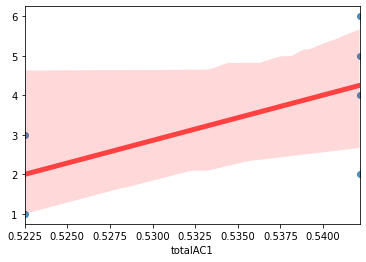

In [4]:
plot_linear_regression(m_dfs['user']['metrics'])

#### Matriz de correlação

<ipython-input-2-c62a57b12cbd>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones(corr_matrix.shape)).astype(np.bool)


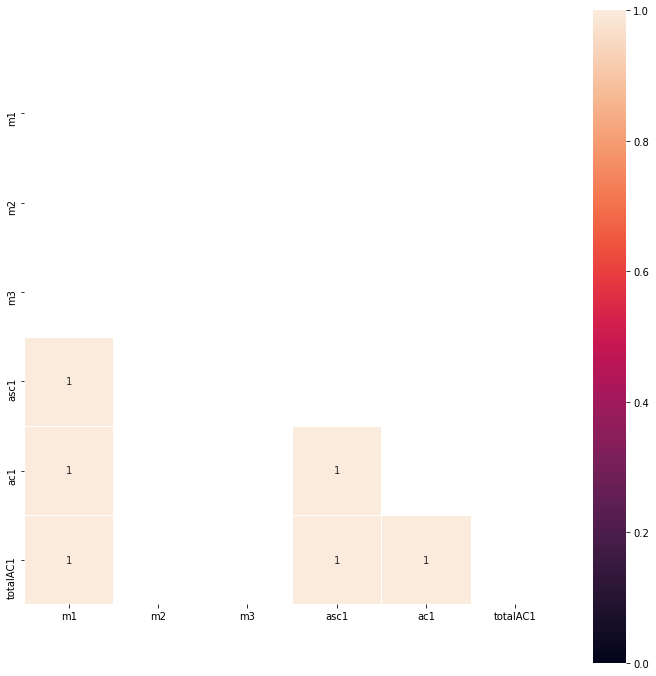

In [5]:
plot_corr_matrix(m_dfs['user']['metrics'])

#### Histograma AC1

/home/linux/Documentos/unb/eps/code/Analytics/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


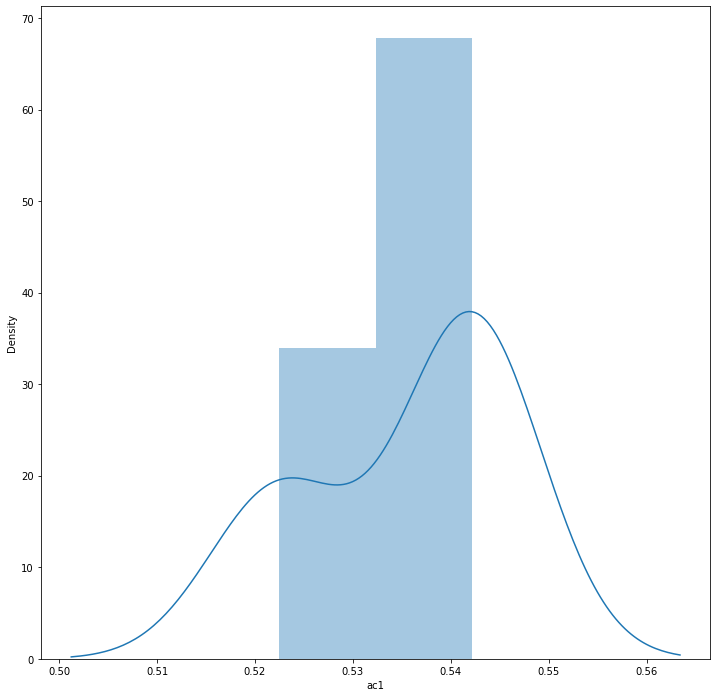

In [6]:
unique_plot_histogram(m_dfs['user']['metrics'], "ac1")

#### Box Plot

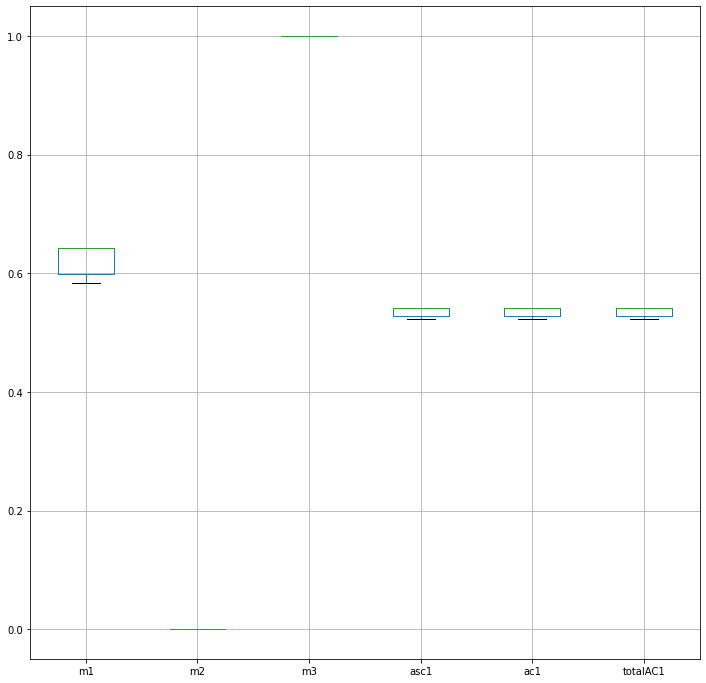

In [7]:
boxplot = m_dfs['user']['metrics'].boxplot(column=['m1', 'm2', 'm3', 'asc1', 'ac1', 'totalAC1'])

#### Estatística descritiva

In [8]:
m_dfs['user']['descriptive']

,m1,m2,m3
mean,0.623016,0.0,1.0
mode,0.642857,0.0,1.0
25%,0.598214,0.0,1.0
50%,0.642857,0.0,1.0
75%,0.642857,0.0,1.0
standart_deviation,0.030738,0.0,0.0
variance,0.000945,0.0,0.0
min,0.583333,0.0,1.0
max,0.642857,0.0,1.0


### Gateway

In [9]:
m_dfs['gateway']['metrics']

,m1,m2,m3,asc1,ac1,totalAC1,ncloc
goblinone,0.454545,0.0,1.0,0.480000,0.480000,0.480000,214
nunito,0.500000,0.0,1.0,0.495000,0.495000,0.495000,270
quicksand,0.454545,0.0,1.0,0.480000,0.480000,0.480000,214
raleway,0.454545,0.0,1.0,0.480000,0.480000,0.480000,216
rubik,0.538462,0.0,1.0,0.507692,0.507692,0.507692,343
zendots,0.538462,0.0,1.0,0.507692,0.507692,0.507692,343


#### Regressão linear

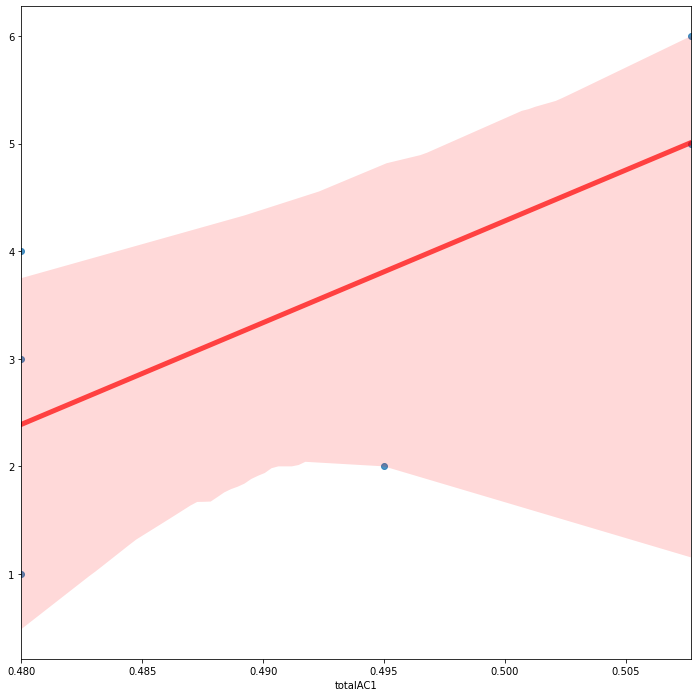

In [10]:
plot_linear_regression(m_dfs['gateway']['metrics'])

#### Matriz de correlação

<ipython-input-2-c62a57b12cbd>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones(corr_matrix.shape)).astype(np.bool)


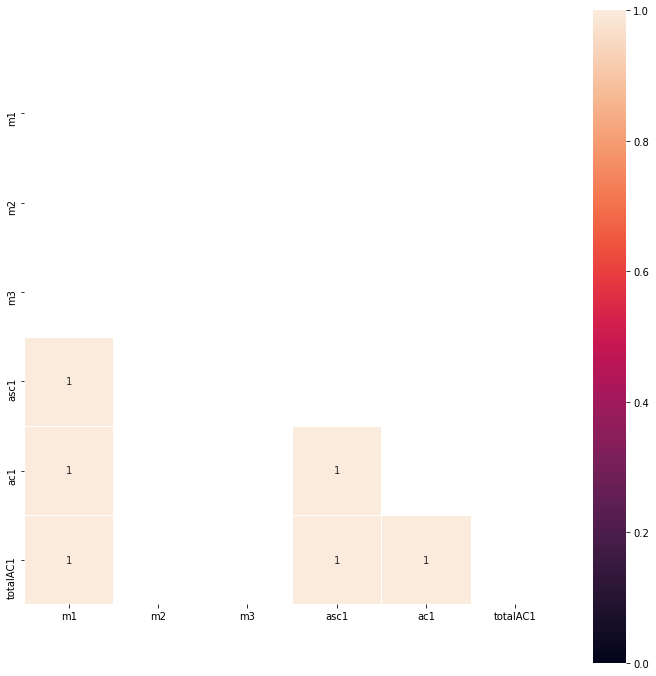

In [11]:
plot_corr_matrix(m_dfs['gateway']['metrics'])

#### Histograma AC1

/home/linux/Documentos/unb/eps/code/Analytics/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


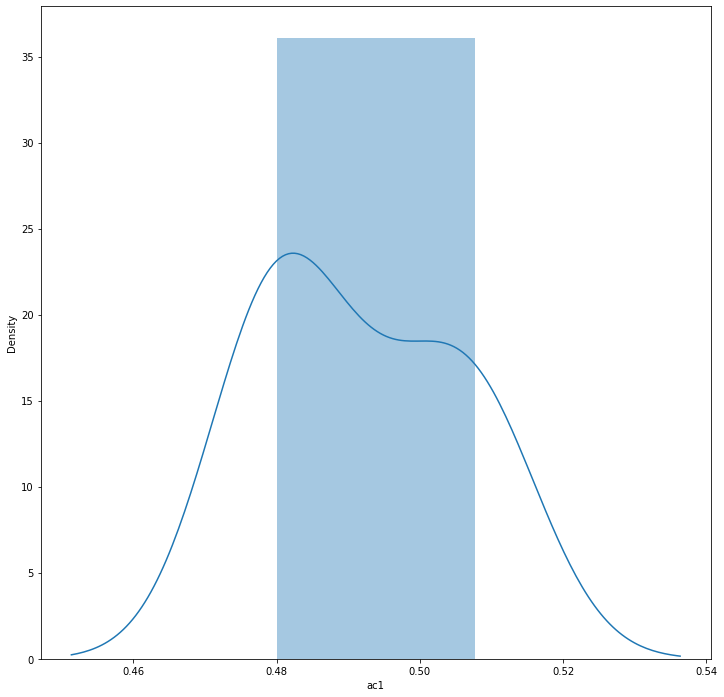

In [12]:
unique_plot_histogram(m_dfs['gateway']['metrics'], "ac1")

#### Box Plot

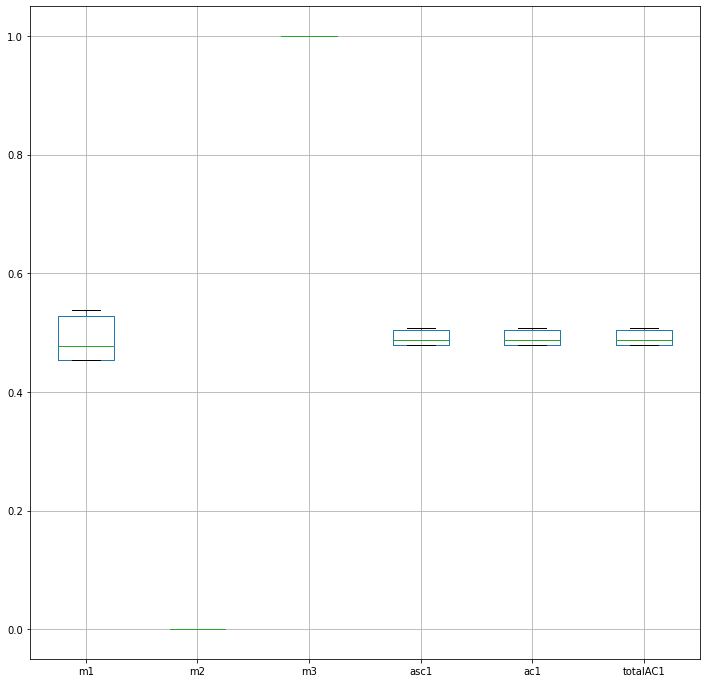

In [13]:
boxplot = m_dfs['gateway']['metrics'].boxplot(column=['m1', 'm2', 'm3', 'asc1', 'ac1', 'totalAC1'])

#### Estatística descritiva

In [14]:
m_dfs['gateway']['descriptive']

,m1,m2,m3
mean,0.490093,0.0,1.0
mode,0.454545,0.0,1.0
25%,0.454545,0.0,1.0
50%,0.477273,0.0,1.0
75%,0.528846,0.0,1.0
standart_deviation,0.041396,0.0,0.0
variance,0.001714,0.0,0.0
min,0.454545,0.0,1.0
max,0.538462,0.0,1.0


### Request

In [15]:
m_dfs['request']['metrics']

,m1,m2,m3,asc1,ac1,totalAC1,ncloc
goblinone,0.769231,0.230769,1.0,0.66,0.66,0.66,481
nunito,0.800000,0.200000,1.0,0.66,0.66,0.66,816
quicksand,0.769231,0.230769,1.0,0.66,0.66,0.66,481
raleway,0.800000,0.200000,1.0,0.66,0.66,0.66,816
rubik,0.800000,0.200000,1.0,0.66,0.66,0.66,835
zendots,0.800000,0.200000,1.0,0.66,0.66,0.66,816


#### Regressão linear

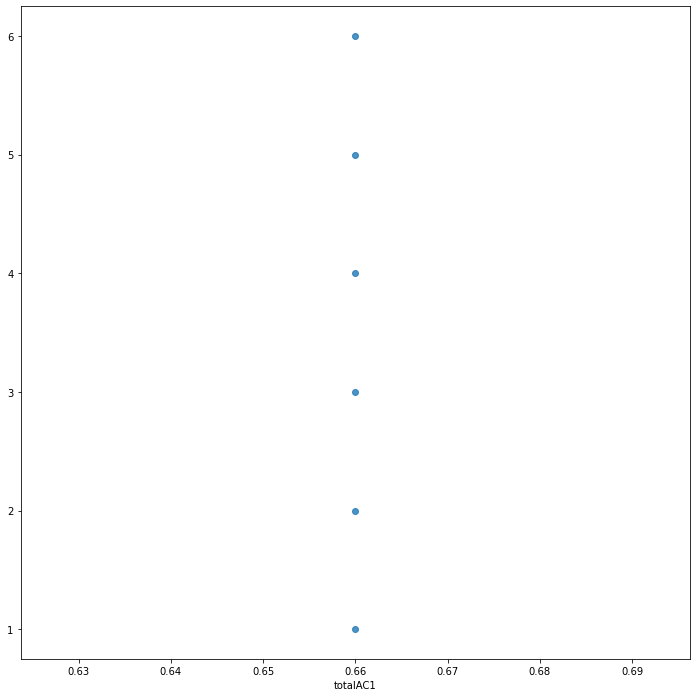

In [16]:
plot_linear_regression(m_dfs['request']['metrics'])

#### Matriz de correlação

<ipython-input-2-c62a57b12cbd>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones(corr_matrix.shape)).astype(np.bool)


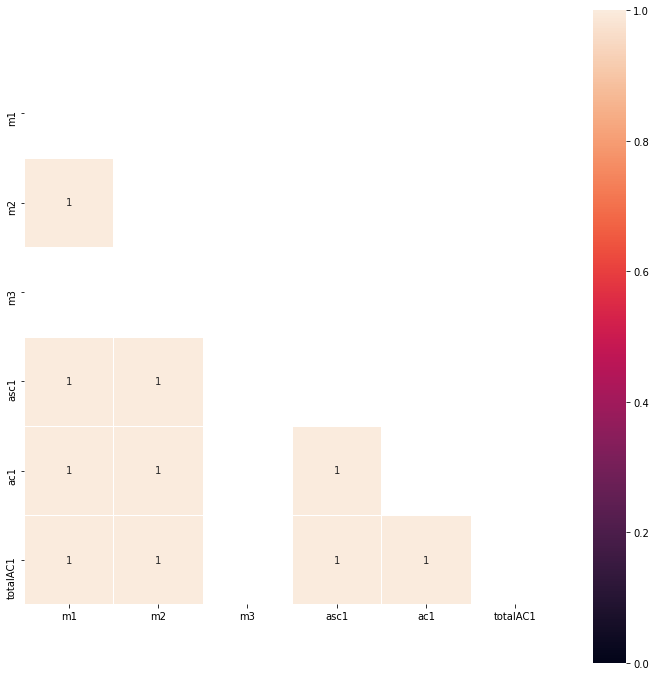

In [17]:
plot_corr_matrix(m_dfs['request']['metrics'])

#### Histograma AC1

/home/linux/Documentos/unb/eps/code/Analytics/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


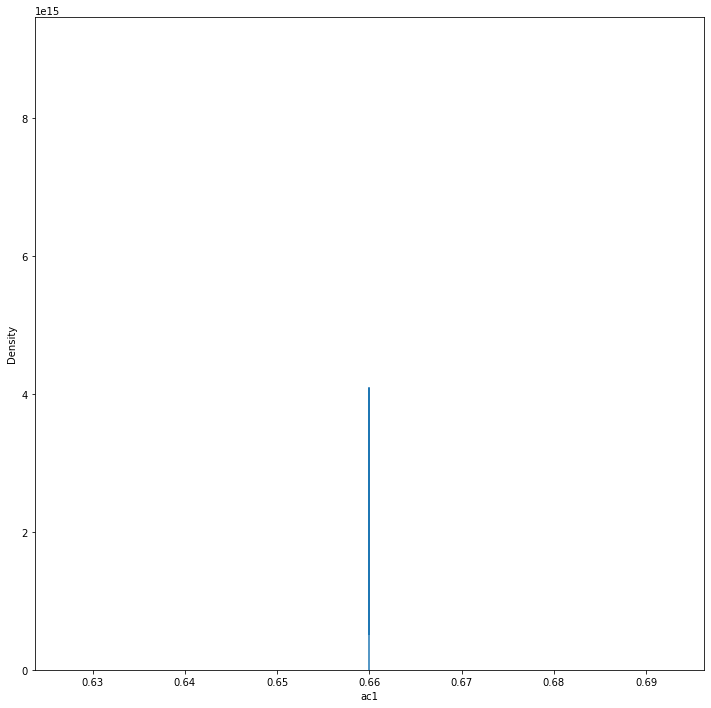

In [18]:
unique_plot_histogram(m_dfs['request']['metrics'], "ac1")

#### Box Plot

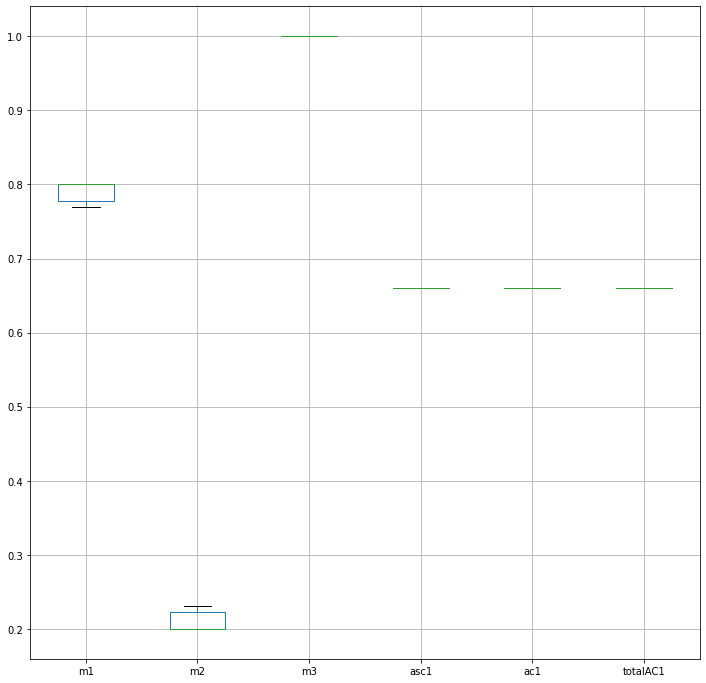

In [19]:
boxplot = m_dfs['request']['metrics'].boxplot(column=['m1', 'm2', 'm3', 'asc1', 'ac1', 'totalAC1'])

#### Estatística descritiva

In [20]:
m_dfs['request']['descriptive']

,m1,m2,m3
mean,0.789744,0.210256,1.0
mode,0.800000,0.200000,1.0
25%,0.776923,0.200000,1.0
50%,0.800000,0.200000,1.0
75%,0.800000,0.223077,1.0
standart_deviation,0.015889,0.015889,0.0
variance,0.000252,0.000252,0.0
min,0.769231,0.200000,1.0
max,0.800000,0.230769,1.0


### Rating

In [21]:
m_dfs['rating']['metrics']

,m1,m2,m3,asc1,ac1,totalAC1,ncloc
goblinone,0.750000,0.250000,1.0,0.66,0.66,0.66,315
nunito,0.727273,0.272727,1.0,0.66,0.66,0.66,238
quicksand,0.750000,0.250000,1.0,0.66,0.66,0.66,315
raleway,0.727273,0.272727,1.0,0.66,0.66,0.66,238
rubik,0.769231,0.230769,1.0,0.66,0.66,0.66,356
zendots,0.769231,0.230769,1.0,0.66,0.66,0.66,356


#### Regressão linear

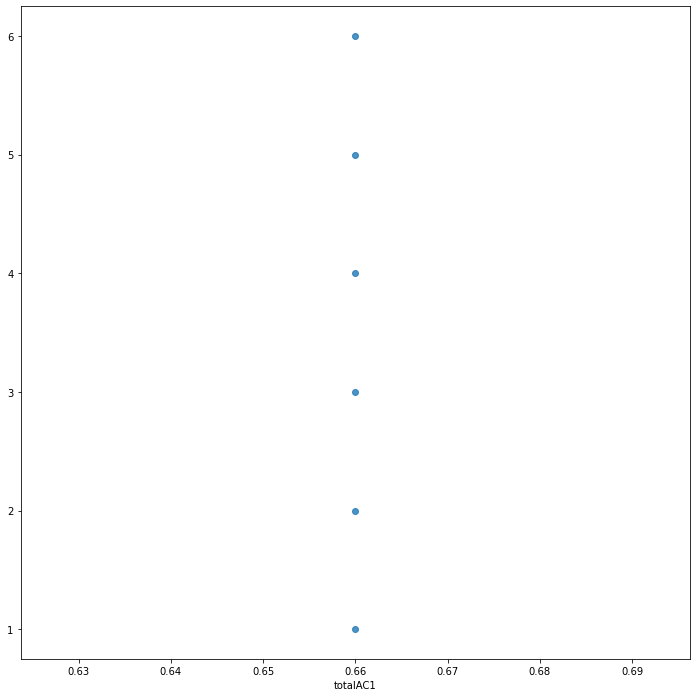

In [22]:
plot_linear_regression(m_dfs['rating']['metrics'])

#### Matriz correlação

<ipython-input-2-c62a57b12cbd>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones(corr_matrix.shape)).astype(np.bool)


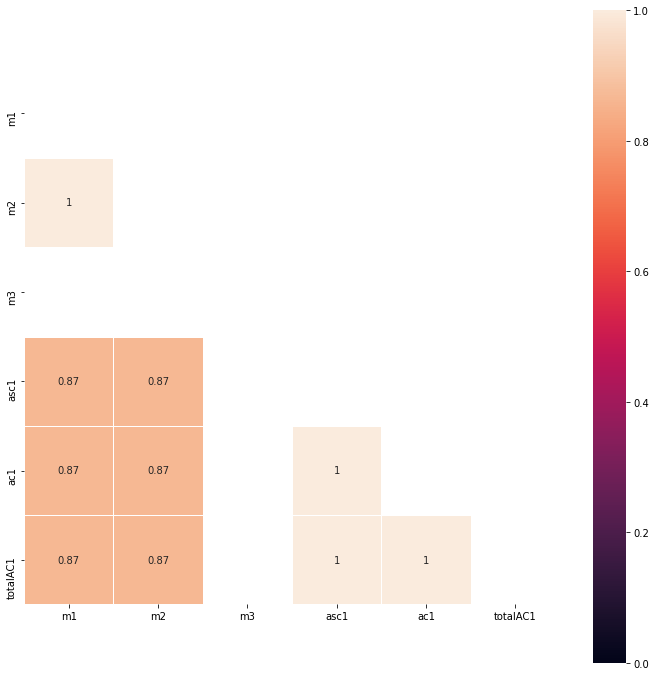

In [23]:
plot_corr_matrix(m_dfs['rating']['metrics'])

#### Histograma AC1

/home/linux/Documentos/unb/eps/code/Analytics/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


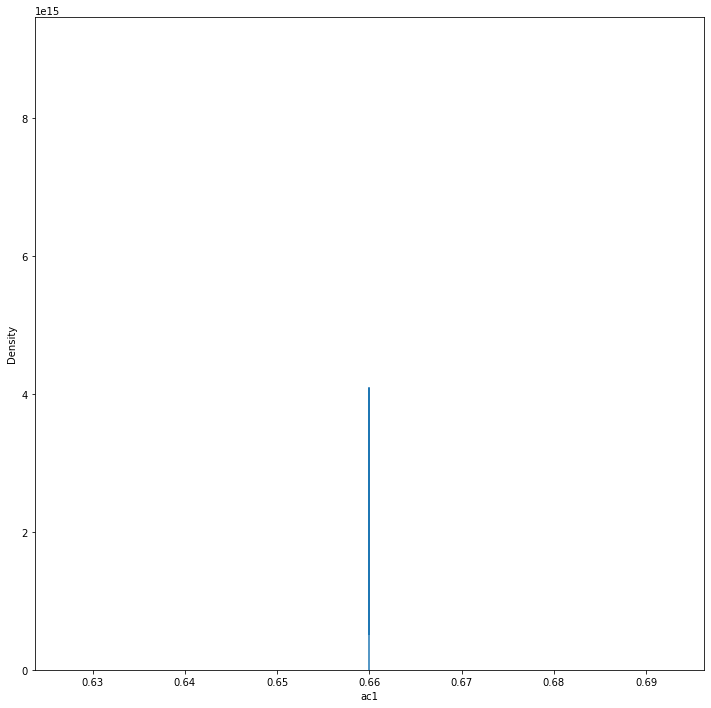

In [24]:
unique_plot_histogram(m_dfs['rating']['metrics'], "ac1")

#### Box Plot

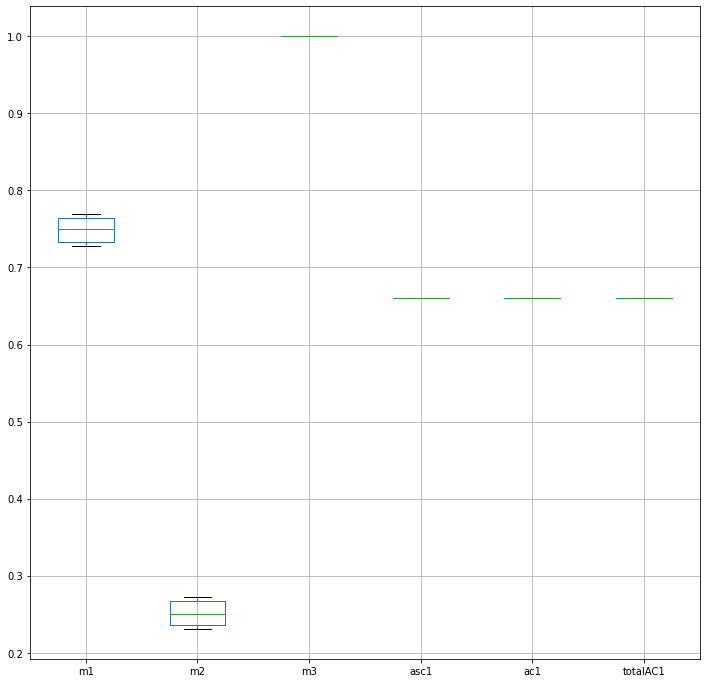

In [25]:
boxplot = m_dfs['rating']['metrics'].boxplot(column=['m1', 'm2', 'm3', 'asc1', 'ac1', 'totalAC1'])

#### Estatística descritiva

In [26]:
m_dfs['rating']['descriptive']

,m1,m2,m3
mean,0.748834,0.251166,1.0
mode,0.769231,0.272727,1.0
25%,0.732955,0.235577,1.0
50%,0.750000,0.250000,1.0
75%,0.764423,0.267045,1.0
standart_deviation,0.018786,0.018786,0.0
variance,0.000353,0.000353,0.0
min,0.727273,0.230769,1.0
max,0.769231,0.272727,1.0


## Métricas de produto

In [27]:
issues_dfs['metrics']

,data_inicio,data_fim,m7,m9,asc2,totalAC2,no_sprint
sprint 0,02/02/2021,08/02/2021,100.00,85.00,66.944444,92.500,0
sprint 1,09/02/2021,15/02/2021,100.00,62.50,59.027778,81.250,1
sprint 2,16/02/2021,22/02/2021,100.00,100.00,72.916667,100.000,2
sprint 3,23/02/2021,01/03/2021,100.00,110.00,77.222222,105.000,3
sprint 4,02/03/2021,08/03/2021,100.00,65.00,60.000000,82.500,4
sprint 5,09/03/2021,15/03/2021,100.00,16.67,45.371667,58.335,5
sprint 6,16/03/2021,22/03/2021,100.00,58.33,59.721389,79.165,6
sprint 7,23/03/2021,29/03/2021,100.00,11.11,45.370000,55.555,7
sprint 8,30/03/2021,05/04/2021,80.00,20.00,41.666667,50.000,8
sprint 10,14/03/2021,19/04/2021,100.00,16.67,47.223333,58.335,10


### Matriz de correlação

<ipython-input-2-c62a57b12cbd>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones(corr_matrix.shape)).astype(np.bool)


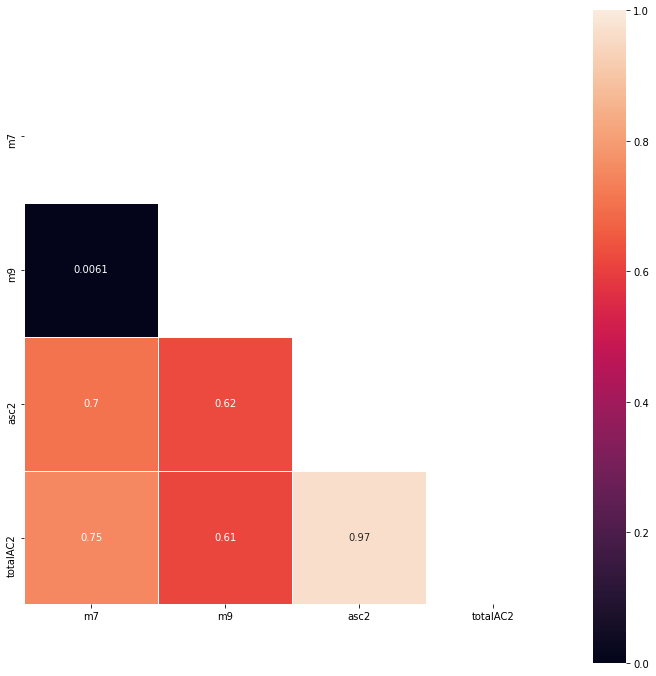

In [28]:
plot_corr_matrix(issues_dfs['metrics'])

### Histograma

/home/linux/Documentos/unb/eps/code/Analytics/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


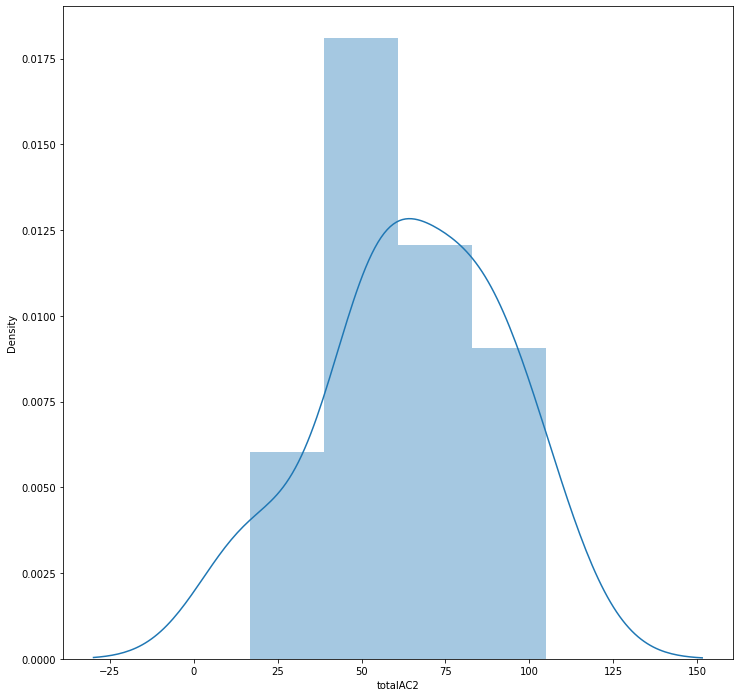

In [29]:
unique_plot_histogram(issues_dfs['metrics'], "totalAC2")

### Boxplot

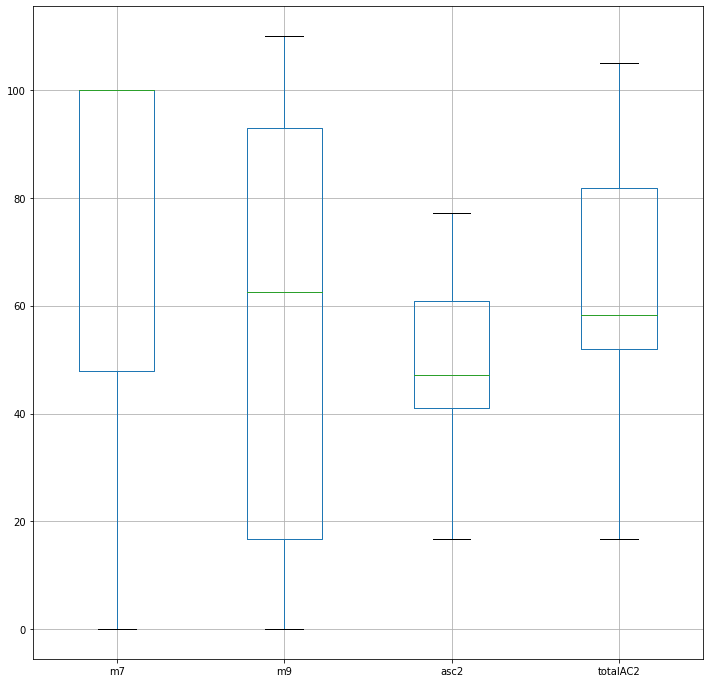

In [30]:
boxplot = issues_dfs['metrics'].boxplot(column=['m7', 'm9', 'asc2', 'totalAC2'])

### Estatística descritiva

In [31]:
issues_dfs['descriptive']

,m7,m9
mean,74.969333,55.422667
mode,100.000000,100.000000
25%,47.915000,16.670000
50%,100.000000,62.500000
75%,100.000000,93.030000
standart_deviation,36.310721,40.684296
variance,1318.468435,1655.211978
min,0.000000,0.000000
max,100.000000,110.000000


### Gráfico de barras totalAC2

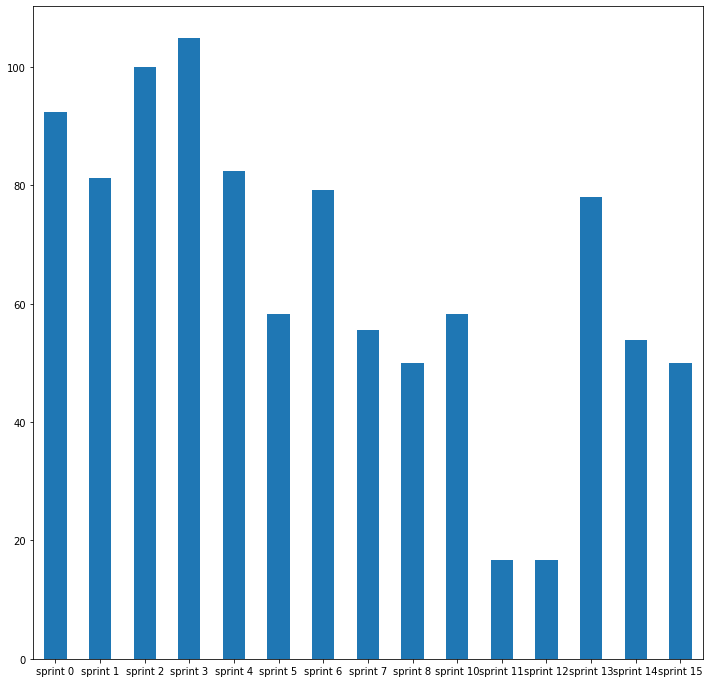

In [32]:
ax = issues_dfs['metrics']['totalAC2'].plot.bar(rot=0)

## Dataframe de métricas m8

In [33]:
issues_dfs['m8']

,hotfix,docs,feature,arq,devops,analytics,us,easy,medium,hard,eps,mds
sprint 0,0.00,85.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,90.00,15.00
sprint 1,0.00,62.50,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,87.50,25.00
sprint 2,0.00,100.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,100.00,25.00
sprint 3,0.00,70.00,0.00,10.0,30.00,0.00,0.00,0.00,0.00,0.00,90.00,60.00
sprint 4,0.00,35.00,0.00,10.0,20.00,0.00,0.00,0.00,0.00,0.00,70.00,45.00
sprint 5,0.00,0.00,0.00,0.0,16.67,0.00,66.67,16.67,33.33,0.00,33.33,66.67
sprint 6,0.00,16.67,25.00,0.0,16.67,0.00,41.67,8.33,66.67,0.00,33.33,41.67
sprint 7,33.33,11.11,0.00,0.0,0.00,0.00,55.56,44.44,55.56,0.00,11.11,88.89
sprint 8,0.00,0.00,0.00,0.0,0.00,20.00,80.00,0.00,80.00,20.00,20.00,80.00
sprint 10,0.00,16.67,0.00,0.0,0.00,0.00,83.33,33.33,66.67,0.00,16.67,83.33
